blackPrice:  6.297254539086019
oneStepTree:  7.798504987524955
blackPrice:  6.297254539086019
oneStepTree1: 	 7.798504987524955
oneStepTree2: 	 8.212289615248919
blackPrice: 	 6.297254539086019
crrNStepTree: 	 6.296057152109465
crr Binomial Tree pricing time:  0.0
BS close form formula pricing time:  0.0


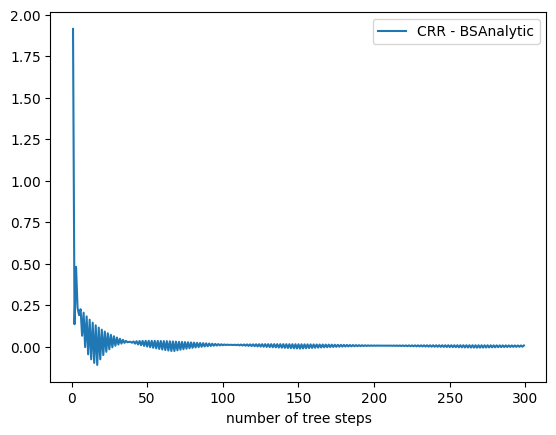

bsPrice = 	  6.297254539086019


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


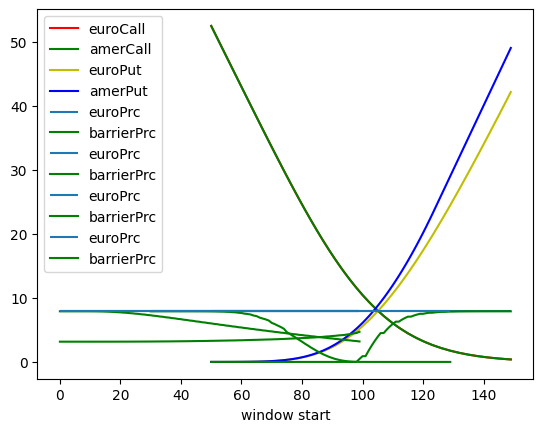

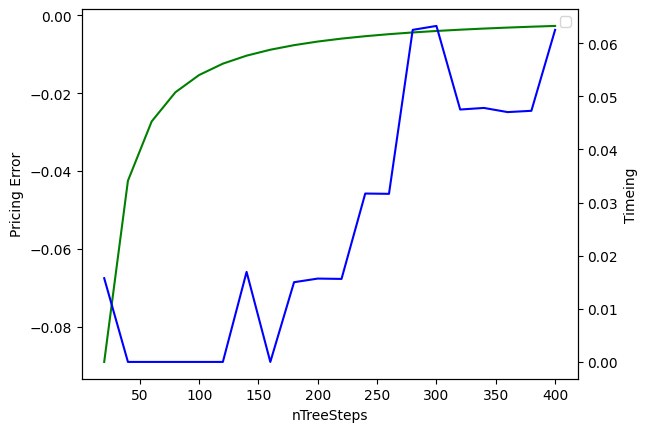

In [9]:
import math
from scipy import optimize

from ipynb.fs.full.binomial import *

In [5]:
def rootBracketing(f, a, b, maxIter, factor):
    for k in range(maxIter):
        if f(a) * f(b) < 0:
            return (a, b)
        if abs(f(a)) < abs(f(b)):
            a += factor * (a-b)  # if f(a) is closer to 0, change a
        else:
            b += factor * (b-a)  # if f(b) is closer to 0, change b
    return (a, b)

def testRootBracketin():
    foo = lambda x : math.exp(x) - 5
    a = 3.4
    b = 5.78
    (a_, b_) = rootBracketing(foo, a, b, 50, 1.6)
    print("brackets:", a_, b_)


if __name__ == "__main__":
    testRootBracketin()

brackets: -0.4080000000000008 5.78


In [10]:
def bisect(f, a, b, tol):
    assert(a < b and f(a) * f(b) < 0)
    c = (a+b) / 2
    while (b-a)/2 > tol:
        print("(a, b) = (", a, ",", b, ")")
        c = (a+b)/2
        if abs(f(c)) < tol:
            return c
        else:
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
    return c

def testBisection():
    # bs price for 10% vol
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = bisect(f, a, b, 1e-6)
    print("Method bisection: implied vol = ", iv)

if __name__ == "__main__":
    testBisection()

(a, b) = ( 0.0001 , 0.5 )
(a, b) = ( 0.0001 , 0.25005 )
(a, b) = ( 0.0001 , 0.125075 )
(a, b) = ( 0.06258749999999999 , 0.125075 )
(a, b) = ( 0.09383124999999999 , 0.125075 )
(a, b) = ( 0.09383124999999999 , 0.10945312499999998 )
(a, b) = ( 0.09383124999999999 , 0.10164218749999998 )
(a, b) = ( 0.09773671874999998 , 0.10164218749999998 )
(a, b) = ( 0.09968945312499998 , 0.10164218749999998 )
(a, b) = ( 0.09968945312499998 , 0.10066582031249999 )
(a, b) = ( 0.09968945312499998 , 0.10017763671874999 )
(a, b) = ( 0.09993354492187498 , 0.10017763671874999 )
(a, b) = ( 0.09993354492187498 , 0.10005559082031248 )
(a, b) = ( 0.09999456787109373 , 0.10005559082031248 )
(a, b) = ( 0.09999456787109373 , 0.10002507934570311 )
(a, b) = ( 0.09999456787109373 , 0.10000982360839841 )
(a, b) = ( 0.09999456787109373 , 0.10000219573974607 )
(a, b) = ( 0.0999983818054199 , 0.10000219573974607 )
Method bisection: implied vol =  0.10000028877258299


In [11]:
def secant(f, a, b, tol, maxIter):
    nIter = 0
    c = (a * f(b) - b * f(a)) / (f(b) - f(a))
    while abs(a - b) > tol and nIter <= maxIter:
        print("(a,b) = (", a, ",", b, ")")
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if abs(f(c)) < tol:
            return c
        else:
            a = b
            b = c
        nIter = nIter+1
    return c

def testSecant():
    # bs price for 10% vol
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = secant(f, a, b, 1e-6, 100)
    print("Method secant: implied vol = ", iv)

if __name__ == "__main__":
    testSecant()

(a,b) = ( 0.0001 , 0.5 )
(a,b) = ( 0.5 , 0.01786929710806077 )
(a,b) = ( 0.01786929710806077 , 0.03500697205225041 )
(a,b) = ( 0.03500697205225041 , 58.15887892137555 )
(a,b) = ( 58.15887892137555 , 0.3453511995504476 )
(a,b) = ( 0.3453511995504476 , -4.956236282274643 )
(a,b) = ( -4.956236282274643 , -0.021209391295342758 )
(a,b) = ( -0.021209391295342758 , 0.6740298315447327 )
(a,b) = ( 0.6740298315447327 , 0.25238213181535946 )
(a,b) = ( 0.25238213181535946 , 0.1309450572439042 )
(a,b) = ( 0.1309450572439042 , 0.10933139199625913 )
(a,b) = ( 0.10933139199625913 , 0.10146153130939728 )
(a,b) = ( 0.10146153130939728 , 0.10009392312534779 )
(a,b) = ( 0.10009392312534779 , 0.10000105609873343 )
Method secant: implied vol =  0.10000000077724291


In [12]:
def falsi(f, a, b, tol):
    assert (a<b and f(a)*f(b)<0)
    c = (a*f(b)-b*f(a))/(f(b)-f(a))
    while abs(a - b) > tol:
        print("(a,b) = (", a, ",", b, ")")
        c = (a*f(b)-b*f(a))/(f(b)-f(a))
        if abs(f(c)) < tol:
            return c
        else:
            if f(a)*f(c)<0:
                b = c
            else:
                a = c
    return c

def testfalsi():
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = falsi(f, a, b, 1e-6)
    print("Method falsi: implied vol = ", iv)
    
if __name__ == "__main__":
    testfalsi()

(a,b) = ( 0.0001 , 0.5 )
(a,b) = ( 0.01786929710806077 , 0.5 )
(a,b) = ( 0.03500697205225041 , 0.5 )
(a,b) = ( 0.051530777463625915 , 0.5 )
(a,b) = ( 0.06708256944568355 , 0.5 )
(a,b) = ( 0.08007982262509816 , 0.5 )
(a,b) = ( 0.08913380620003464 , 0.5 )
(a,b) = ( 0.09448567499466176 , 0.5 )
(a,b) = ( 0.09731677479452763 , 0.5 )
(a,b) = ( 0.09872271630291936 , 0.5 )
(a,b) = ( 0.09939852623155705 , 0.5 )
(a,b) = ( 0.09971823002750001 , 0.5 )
(a,b) = ( 0.09986832309002086 , 0.5 )
(a,b) = ( 0.09993853528505885 , 0.5 )
(a,b) = ( 0.09997132463615324 , 0.5 )
(a,b) = ( 0.09998662532839954 , 0.5 )
(a,b) = ( 0.09999376255805192 , 0.5 )
(a,b) = ( 0.09999709125124573 , 0.5 )
(a,b) = ( 0.09999864357791272 , 0.5 )
(a,b) = ( 0.09999936747405795 , 0.5 )
(a,b) = ( 0.09999970504251077 , 0.5 )
(a,b) = ( 0.09999986245671465 , 0.5 )
(a,b) = ( 0.09999993586149475 , 0.5 )
Method falsi: implied vol =  0.09999997009126552


In [13]:
def testBrent():
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = optimize.brentq(f, a, b)
    print("Method Brent: implied vol = ", iv)

if __name__ == "__main__":
    testBrent()

Method Brent: implied vol =  0.09999999999997695
